# Homework assignment - Fruits

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of fruit images. The dataset contains segmented images of 60 different fruits. You'll have to implement a convolutional network.

## Rules and Comments
- This is an ML class so to pass the homework you do have to implement a working classifier, just loading the data is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course)
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID in the box below for easier identification.

**Name: Vitalii Naumov**  
**Neptun ID: FY46IN** 

In [1]:
import keras
import tensorflow

print(tensorflow.__version__)
print(keras.__version__)

Using TensorFlow backend.


1.14.0
2.2.5


In [2]:
# Some useful imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

## Dataset preparations
First download the data and extract it:

In [4]:
!wget http://vegesm.web.elte.hu/fruits_small.zip
!unzip fruits_small.zip > /dev/null

--2020-05-04 19:27:17--  http://vegesm.web.elte.hu/fruits_small.zip
Resolving vegesm.web.elte.hu (vegesm.web.elte.hu)... 157.181.1.225
Connecting to vegesm.web.elte.hu (vegesm.web.elte.hu)|157.181.1.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186322919 (178M) [application/zip]
Saving to: ‘fruits_small.zip.1’

fruits_small.zip.1  100%[===================>] 177.69M  2.14MB/s    in 88s     

2020-05-04 19:28:46 (2.01 MB/s) - ‘fruits_small.zip.1’ saved [186322919/186322919]



This will download and extract the dataset into `/content/fruits-small`. You can inspect the files in the sidebar on the left, under the *Files* tab. The dataset contains 100x100 pixel images of fruits, grouped by classes into folders. 

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set.



In [22]:
base_dir = 'fruits-small'
train_dir = os.path.join(base_dir, 'train')
test_dir =  os.path.join(base_dir, 'test')

Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images and prints them with the class names.

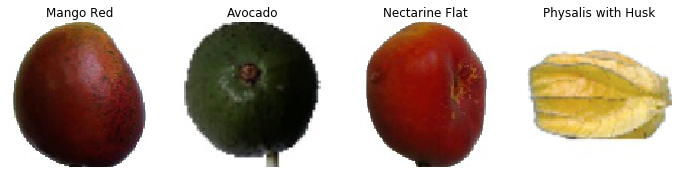

In [17]:
selected = np.random.choice(sorted(os.listdir(train_dir)),4)

plt.figure(figsize=(15, 15))    
for i in range(len(selected)):
    plt.subplot(3,5,i+1)
    new_dir = os.path.join(train_dir, selected[i])
    rnd_img = np.random.choice(os.listdir(new_dir))
    img = plt.imread(os.path.join( new_dir, rnd_img))
    plt.imshow(img)
    plt.title(selected[i])
    plt.axis('off')

### Splitting the dataset

Notice that the dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. 

In [29]:
#Create validation set folders
os.makedirs(base_dir +'/validation')
val_dir = os.path.join(base_dir, 'validation')
list_dir = os.listdir(train_dir)

for i in range(len(list_dir)):
    name_dir = list_dir[i]
    os.makedirs(os.path.join(val_dir, name_dir))

Considering the average amount of pictures belonging to each class as 100, I would like to extract 15% of the data and assign it as a validation set.


In [83]:
current_dir = os.path.join(train_dir,os.listdir(train_dir)[1])
destination_dir = os.path.join(val_dir, os.listdir(train_dir)[1])
extract = np.random.choice(os.listdir(current_dir),20)
print(extract)
current_dir = os.path.join(current_dir, extract[1])
destination_dir = destination_dir + '/' + extract[1]
#print(current_dir, destination_dir)
#os.rename(destination_dir,current_dir)
c=0
for i in range(len(extract)):
    for j in range(len(extract)):
        if (extract[i] == extract[j]):
            c+=1
c            

['r2_116_100.jpg' 'r_82_100.jpg' 'r_19_100.jpg' 'r_300_100.jpg'
 '154_100.jpg' 'r2_154_100.jpg' '81_100.jpg' 'r_232_100.jpg'
 'r2_48_100.jpg' '192_100.jpg' 'r_290_100.jpg' 'r_78_100.jpg'
 'r_42_100.jpg' '242_100.jpg' 'r2_86_100.jpg' 'r2_46_100.jpg'
 '190_100.jpg' '125_100.jpg' 'r_284_100.jpg' 'r2_94_100.jpg']


20

In [86]:
for i in range(len(list_dir)):
    #list of files i have to extract
    current_dir = os.path.join(train_dir,os.listdir(train_dir)[i])
    extract = np.random.choice(os.listdir(current_dir),10)
    destination_dir = os.path.join(val_dir, os.listdir(train_dir)[i])
    for p in range(len(extract)):
        #os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
        cur_dir = os.path.join(current_dir, extract[p])
        dest_dir = os.path.join(destination_dir, extract[p])
        os.rename(cur_dir, dest_dir)

NotADirectoryError: [Errno 20] Not a directory: 'fruits-small/train/.DS_Store'

### Preprocess the dataset

We need to augment the data, since we do not have many images per classes. Create an augmentation mechanism, data automatically does the following transformations during training:
- flip images horizontally
- rotates them
- performs zooming

In [0]:
# ADD YOUR CODE HERE

## Training the network

Implement and train the following architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 32 filters
- A 2x2 MaxPooling layer
- Two convolutional layers with 3x3 kernels and 64 filters each
- A MaxPooling layer
- Another 3x3 convolutional layer with 128 filters, followed by a MaxPooling layer
- A fully connected layer of 512 units
- A final softmax layer

All layers have ReLU activations. Train the network for 15 epochs.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now, that the model has finished training, plot the accuracy and loss over time, both for training and validation data:

In [0]:
# ADD YOUR CODE HERE

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it?

**Write your answers below**

Finally, calculate the performance of your model on the test set:

In [0]:
# ADD YOUR CODE HERE